# Neuronové sítě

Na přednášce jste slyšeli úvod do další přírodou inspirovaná techniky-- neuronových sítí. Mezi jejich nejjednodušší modely patří perceptron a vícevrstevný perceptron. Na cvičení si je tedy zkusíme sami naiplementovat.

## Perceptron

Nejprve si tedy zkusíme naimplementovat jednoduchý perceptronový algoritmus učení. K tomu budeme potřebovat třídu *Perceptron*, kde si definujeme, jak jednoduchý perceptron vypadá. Při inicializaci se nastaví maximální počet iterací a learning rate, který určuje rychlost učení algoritmu, a přípraví se prázdná matice vah rozšířená o jeden sloupeček samých 1, který bude simulovat přičtení prahu.

Funkce *Predict* nám pro daný vstup bude predikovat jeho výstup a to tak, že se spočítá hodnota aktivační funkce ve vstupním bodě a pokud bude větší než 0, bude aktivace 1, jinak bude aktivace 0. 

Budeme ještě potřebovat funkci *fit*, kde se budou trénovat váhy perceptronu tak, že pro daný vstup spočteme jeho predikovaný výstup a pokud je špatný, tak upravíme váhy tak, aby příště predikoval výstup správně.

In [1]:
import numpy as np
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pylab as pl
from sklearn import preprocessing

C:\Users\katie\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class Perceptron:
    def __init__(self, max_iterations, number_of_inputs, learning_rate=0.1):
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.weights = np.random.normal(size=number_of_inputs+1)
        
    def predict(self, inputs):
        # spocitame vystup funkce pro dany vstup, vahy a prah
        activation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        # spocitame aktivaci z funkce sgn do {-1,1} a to prevedeme na {0,1}
        return (np.sign(activation)+1)/2
    
    
    def fit(self, inputs, labels):
        for i in range(self.max_iterations):
            for x, y in zip(inputs, labels):
                prediction = self.predict(x)               
                # aktualizujem vahy a prahy
                self.weights[1:] += self.learning_rate * (y - prediction) * x
                self.weights[0] += self.learning_rate * (y - prediction)

Abychom náš perceptron otestovali, vygenerujem si náhodná data pomocí knihovny *scikit-learn*, která nám umí vrátit 2 lineárně separabilí třídy bodů.

In [3]:
inputs, labels = datasets.make_blobs(centers=2, n_samples=200)
perc = Perceptron(100,2)
perc.fit(inputs, labels)

Ještě by bylo dobré umět si vizualizovat výsledky, a proto si napíšeme následující funkci, která bude umět vykreslit data i oddělující nadrovinu.

In [4]:
def draw_boundary(model, inputs, labels):
    
    x_min = inputs[:, 0].min() - 1
    x_max = inputs[:, 0].max() + 1
    y_min = inputs[:, 1].min() - 1 
    y_max = inputs[:, 1].max() + 1

    # vytvori obdelnikovou mrizku s vyse spocitanymi rozmery
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # vykresleni rozhodovaci hranice -- kazdemu bodu se podle tho priradi barva
    predicted = model.predict(np.c_[xx.ravel(), yy.ravel()])
    predicted = predicted.reshape(xx.shape)
    
    plt.figure(figsize=(12,8))
    plt.scatter(inputs[:,0], inputs[:,1], c=labels)
    plt.contourf(xx, yy, predicted, alpha=0.4)
    plt.show()

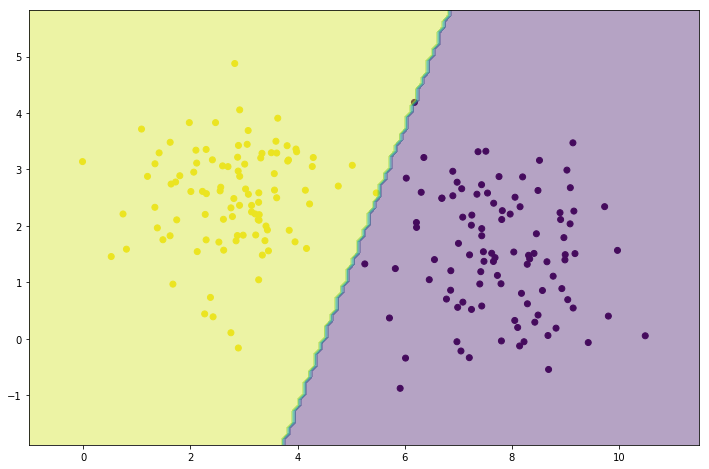

In [5]:
inputs, labels = datasets.make_blobs(centers=2, n_samples=200)
perc = Perceptron(100,2)
perc.fit(inputs, labels)
draw_boundary(perc, inputs, labels)

## Vícevrstvý perceptron

Jednoduchý perceptron už umíme, tak si nyní s jeho pomocí zkusíme napsat vícevrstevný perceptron, neboli celou neuronovou síť. V inicializační části nastavíme velikosti vrstev a poté matice vah mezi jednotlivými vrstvami jakožto náhodné hodnoty. Dále bude potřeba funkce predikce, která pro daný vstup spočítá výstup sítě a následně updatuje váhy pomocí backpropagace. Nakonec bude třeba už jen umět predikovat výstupní hodnotu sítě pro daný vstup.

In [6]:
class MultiLayerPerceptron:
    def __init__(self, layer_sizes,alpha=0.1):
        self.layer_sizes = layer_sizes
        self.layers = []
        self.alpha = alpha
        
        #for (p, n) in zip(self.layer_sizes, self.layer_sizes[1:]):
        #    self.layers.append(np.random.normal(size=(p+1, n)))
            
        for i in range(0,len(self.layer_sizes)-1):
            self.layers.append(np.random.normal(size=(self.layer_sizes[i]+1,self.layer_sizes[i+1])))
            
    def predict(self, X):
        activations = np.array(X)
        try:
            for layer in self.layers:
                activations = 1/(1+np.exp(np.dot(activations, layer[1:])+layer[0]))
                #activations_1 = self._add_ones(activations) # pridame 1 misto prahu
                #activations = 1/(1+np.exp(np.dot(activations_1, layer)))
        except Exception as e:
            print("Activations:", activations)
            raise e

        return activations
    
    def fit(self, inputs, outputs):
        pass
        # je potreba spocitat vystup site
        # pak je potreba update vah pomoci backpropagace
        # zkuste dopsat sami :P
        
    # pridame sloupecek jednicek k neuronum misto prahu     
    def _add_ones(self, x):
        ones = np.ones(shape=(x.shape[0],1))
        x = np.append(ones,x, axis=1)        
        return x

In [7]:
mlp = MultiLayerPerceptron([3,5,2])
mlp.predict(np.array([[1,2,3], [1,2,7]]))

array([[0.14663685, 0.68593074],
       [0.13376645, 0.75139148]])

## Úkol na cvičení

Zkuste si dopsat funkci ```fit``` u vícevrstevného perceptronu a natrénovat ho na datasetu *winequality-white.csv* z UCI machine learning repository. Cílem u tohoto datasetu je predikovat kvalitu vína na základě 12 změřených fyzikálních a chemických vlastností. Kvalita se hodnotí na stupnici 0-10. 

In [8]:
data = pd.read_csv('winequality-white.csv', delimiter=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
counter=collections.Counter(data['quality'])
print(counter)

Counter({6: 2198, 5: 1457, 7: 880, 8: 175, 4: 163, 3: 20, 9: 5})


Když se ale reálně podíváme na rozložení výsledných hodnot kvality vín v datasetu, tak vidíme, že většina výstupů je mezi 4-8. Proto si zjednoduššíme práci a dataset si upravíme tak, aby predikoval jen 5 výstupních kategorií s hodnotami 4-8 tak, že 3 sloučíme se 4 a 9 s 8.

In [10]:
data['quality'].replace({3: 4, 9: 8}, inplace=True)
counter=collections.Counter(data['quality'])
print(counter)

Counter({6: 2198, 5: 1457, 7: 880, 4: 183, 8: 180})


 Na tomto upraveném datasetu si nyní zkusíme pustit vícevrstevný perceptron. Vidíme, že výsledky jsou nám k ničemu, protože nemáme naprogramovanou funkci ```fit```. Zkuste si ji doprogramovat. 

In [11]:
k = 10 
mlp = MultiLayerPerceptron([len(data.columns),k,data.quality.nunique()])
mlp.predict(data)

array([[0.17969415, 0.9743625 , 0.51121874, 0.41745634, 0.43302956],
       [0.05988108, 0.9017203 , 0.62504515, 0.10740304, 0.90599468],
       [0.0686515 , 0.98701943, 0.45884223, 0.76902441, 0.25405987],
       ...,
       [0.0210594 , 0.94887286, 0.57444546, 0.36034211, 0.80889352],
       [0.05961135, 0.90196674, 0.62546734, 0.10720402, 0.90590108],
       [0.05134997, 0.91071827, 0.61755786, 0.13179472, 0.89487629]])

## Knihovna Tensorflow

Knihovna Tensorflow je určená pro snažší implementaci různých algoritmů strojového učení, mezi nimi i samozřejmě neuronové sítě. Zkusíme si s její pomocí naimplementovat stejnou jednoduchou neuronovou sít, jako jsme si ručně psali výše. Budeme potřebovat si vyrobit data, potom definovat síť a nakonec ji natrénovat na trénovacích datech a nechat ji predikovat na testovacích datech.

Musíme ale ještě upravit funkci pro vizualizaci, protože vícetřídová klasifikace nám vrací výstup jakožte pole, kde pro tu jednu vybranou třídu ideálně bude na jejím indexu 1 a všude jinde budou 0. Tomuto výstupu se tak říká one-hot-encoding.

In [12]:
def draw_boundary(model, inputs, labels):
    
    x_min = inputs[:, 0].min() - 1
    x_max = inputs[:, 0].max() + 1
    y_min = inputs[:, 1].min() - 1 
    y_max = inputs[:, 1].max() + 1

    # vytvori obdelnikovou mrizku s vyse spocitanymi rozmery
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # vykresleni rozhodovaci hranice -- kazdemu bodu se podle tho priradi barva
    predicted = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # pridana radka pro vyber klasifikovane tridy
    predicted = np.argmax(predicted, axis=1)
    
    predicted = predicted.reshape(xx.shape)
    
    plt.figure(figsize=(12,8))
    plt.scatter(inputs[:,0], inputs[:,1], c=labels)
    plt.contourf(xx, yy, predicted, alpha=0.4)
    plt.show()
    model.predict(x_test[:10])

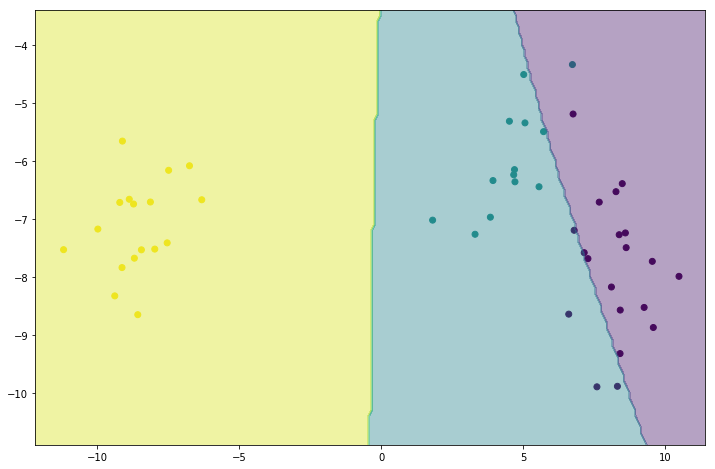

In [13]:
# nejprve si pripravime data a rozdelime na trenovaci a testovaci mnozinu
x, y = datasets.make_blobs(n_samples=300, centers=3)

x_train, x_test = x[:250], x[250:]
y_train, y_test = y[:250], y[250:]

# definujeme architekture site
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))


# nastavime optimalizaci
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# natrenujeme sit na trenovacich datech
model.fit(x_train, y_train, epochs=200, verbose=0)
# udelame predpovedi na trenovacich datech
draw_boundary(model, x_test, y_test)


Ještě si zkusíme pustit neuronovou síť z tensorflow na datasetu o víně.

In [18]:
# nejprve si pripravime data a labely posuneme z mnoziny (4,8) do mnoziny (0,4)
data['quality'].replace({4: 0, 5: 1, 6:2, 7:3, 8:4}, inplace=True)
labels = data['quality'].values

# normalizace dat
values = data[data.columns.difference(['quality'])].values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(values)

# rozdelime na trenovaci a testovaci mnozinu
x, y = data_scaled, labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# definujeme architekture site
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(5, activation=tf.nn.softmax))

# nastavime optimalizaci
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# natrenujeme sit na trenovacich datech
model.fit(x_train, y_train, epochs=200, verbose=0)

Zkusíme si predikovat výstup na testovacích datech a spočítat chybu. 

In [19]:
# predikce na test datech
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=-1)
model_mse = mean_squared_error(predicted_classes,y_test)
print(model_mse)

0.7534693877551021


Na závěr se podíváme pomocí matice konfuze, která třída byla kolikrát dobře nebo zle predikovaná.

[[  0  15  67   0]
 [  0 123 234   1]
 [  0  87 457   0]
 [  0  25 215   1]]


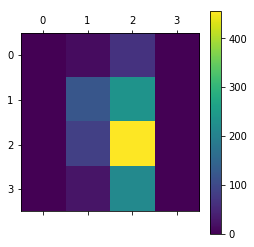

[[ 82   0   0   0]
 [  0 358   0   0]
 [  0   0 544   0]
 [  0   0   0 241]]


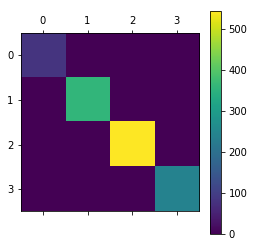

In [20]:
# vykresleni, jak bylo co klasifikovano
confusion_matrix = metrics.confusion_matrix(y_test, predicted_classes)
print(confusion_matrix)

pl.matshow(confusion_matrix)
pl.colorbar()
pl.show()

confusion_matrix = metrics.confusion_matrix(y_test, y_test)
print(confusion_matrix)

pl.matshow(confusion_matrix)
pl.colorbar()
pl.show()